In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [77]:
df = pd.read_csv("Linear Regression - Sheet1.csv")
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [78]:
X = df['X'].values 
y = df['Y'].values

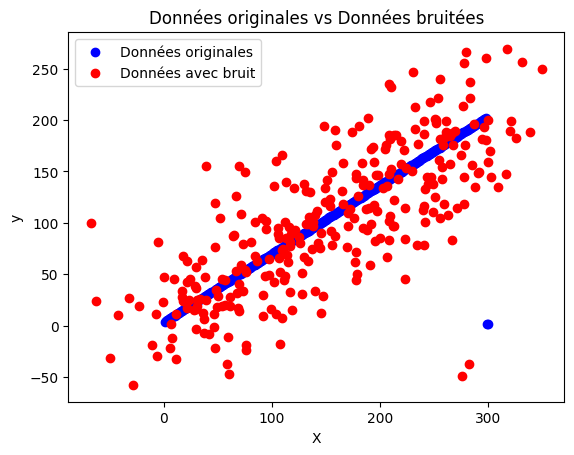

In [79]:
# Ajouter du bruit aux données X et y
noise_level = 35 # Par exemple, 10% de bruit
X_noisy = df['X'].values + noise_level * np.random.randn(len(df['X']))
y_noisy = df['Y'].values + noise_level * np.random.randn(len(df['Y']))

# Visualiser les données originales et bruitées
plt.scatter(df['X'], df['Y'], color='blue', label='Données originales')
plt.scatter(X_noisy, y_noisy, color='red', label='Données avec bruit')
plt.title('Données originales vs Données bruitées')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


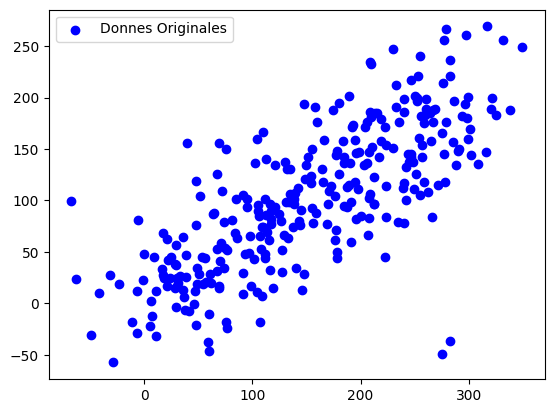

In [80]:
plt.scatter(X_noisy,y_noisy,color='blue',label='Donnes Originales')
plt.legend()
plt.show()

In [81]:
# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données (optionnel)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))  # X_train a une seule caractéristique
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

In [82]:
# Créer un modèle ANN pour la régression
model = Sequential()

# Ajout d'une couche cachée dense avec 10 neurones et la fonction d'activation ReLU
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Ajout d'une couche de sortie avec 1 neurone (pour la régression)
model.add(Dense(1))

# Compiler le modèle avec la perte 'mse' (Mean Squared Error) et l'optimiseur Adam
model.compile(optimizer='adam', loss='mse')


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Entraîner le modèle ANN
history = model.fit(X_train_scaled, y_train, epochs=750, validation_split=0.2)


Epoch 1/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 14688.4961 - val_loss: 11621.9922
Epoch 2/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14182.2930 - val_loss: 11616.5127
Epoch 3/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14536.8340 - val_loss: 11610.8662
Epoch 4/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14112.2002 - val_loss: 11605.1016
Epoch 5/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14141.7139 - val_loss: 11599.1865
Epoch 6/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14671.5693 - val_loss: 11593.1064
Epoch 7/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14151.1758 - val_loss: 11586.8789
Epoch 8/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14162.6133 - val_loss: 11580.4814
Epoch 9/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13475.7598 - val_loss: 11573.9688
Epoch 10/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14325.6855 - val_loss: 11567.2344
Epoch 11/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13530.1768 - val_loss: 11560.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6979 
Test Loss (MSE): 7.616240501403809
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


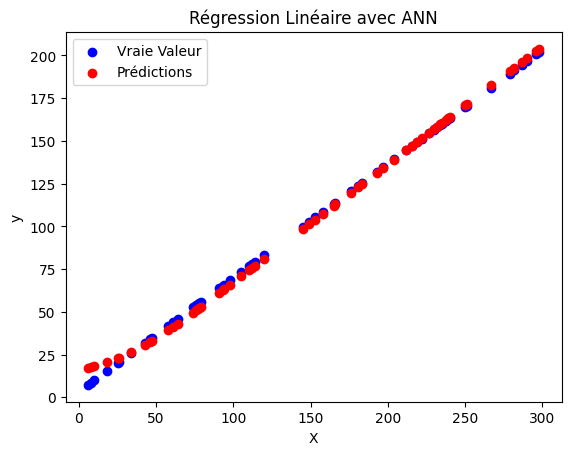

In [86]:
# Évaluer le modèle sur le set de test
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Prédire des valeurs
y_pred = model.predict(X_test_scaled)

# Afficher les résultats
plt.scatter(X_test, y_test, color='blue', label='Vraie Valeur')
plt.scatter(X_test, y_pred, color='red', label='Prédictions')
plt.title('Régression Linéaire avec ANN')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


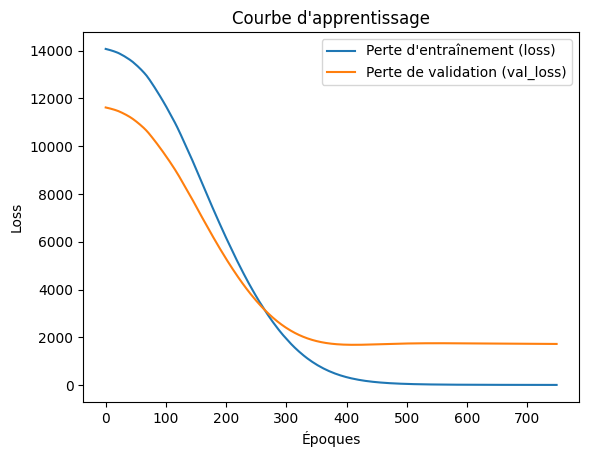

In [87]:
# Tracer la courbe d'apprentissage
plt.plot(history.history['loss'], label='Perte d\'entraînement (loss)')
plt.plot(history.history['val_loss'], label='Perte de validation (val_loss)')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()
plt.show()
